<a href="https://colab.research.google.com/github/Devphadatare/Cognifyz/blob/main/Lev_3_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Predictive Modeling

#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


#Data Loading

In [2]:
# Load the dataset
data = pd.read_csv('Dataset .csv')

# Display the first few rows of the dataset
print(data.head())


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

#Data Preprocessing

In [3]:
# Step 1: Data Preprocessing
# Handle missing values
data.dropna(inplace=True)

# Select relevant features for the model
features = ['Average Cost for two', 'Price range', 'Votes', 'Longitude', 'Latitude']
target = 'Aggregate rating'

# Encode categorical variables
label_encoders = {}
for column in ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
    features.append(column)


#Model Building

In [4]:
# Step 2: Model Building
# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100)
}


#Model Training and Evaluation

In [5]:
# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R2': r2}
    print(f"{model_name} - MSE: {mse:.4f}, R2: {r2:.4f}")


Linear Regression - MSE: 1.5919, R2: 0.3049
Decision Tree - MSE: 0.1926, R2: 0.9159
Random Forest - MSE: 0.0962, R2: 0.9580


#Performance Comparison

                        MSE        R2
Linear Regression  1.591864  0.304873
Decision Tree      0.192588  0.915902
Random Forest      0.096157  0.958011


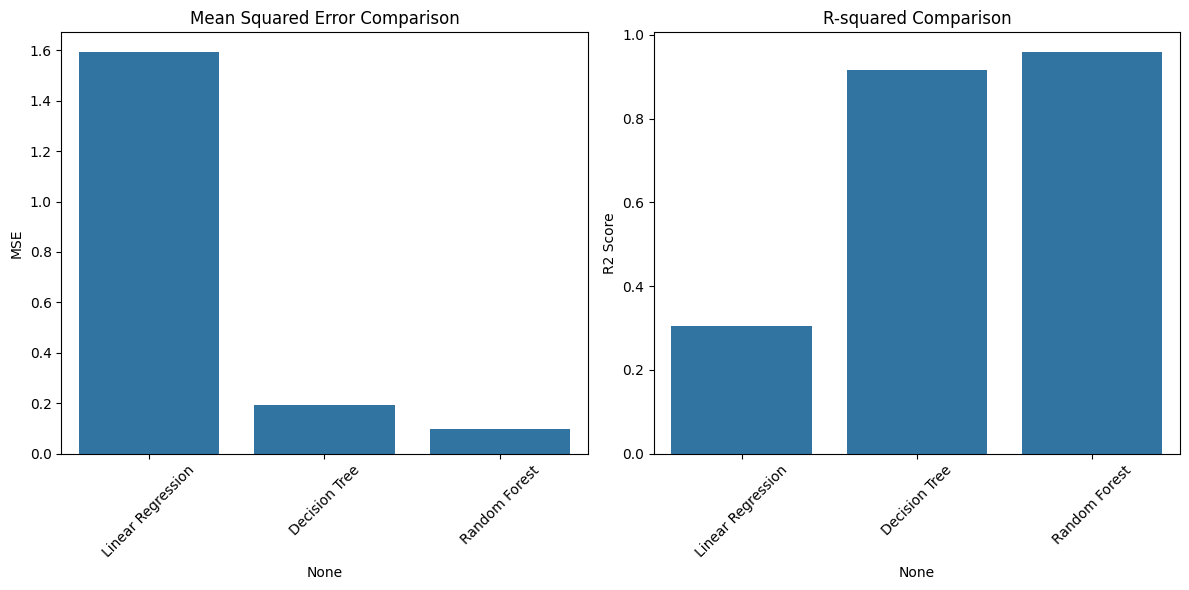

In [6]:
# Step 3: Compare Performance
# Display model performance
results_df = pd.DataFrame(results).T
print(results_df)

# Plot the performance of models
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=results_df.index, y='MSE', data=results_df)
plt.title('Mean Squared Error Comparison')
plt.ylabel('MSE')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=results_df.index, y='R2', data=results_df)
plt.title('R-squared Comparison')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#Task 2: Customer Preference Analysis

#Importing Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Data Loading

In [8]:
# Load the dataset
file_path = 'Dataset .csv'
data = pd.read_csv(file_path)


#Data Preprocessing

In [9]:
# Split the 'Cuisines' column to handle multiple cuisines for each restaurant
data['Cuisines List'] = data['Cuisines'].str.split(', ')

# Explode the list to create a row for each cuisine type
exploded_data = data.explode('Cuisines List')


#Analysis
Relationship Between Cuisine Type and Rating

In [16]:
# Calculate average rating for each cuisine
cuisine_rating = exploded_data.groupby('Cuisines List')['Aggregate rating'].mean().reset_index()
print(cuisine_rating)

     Cuisines List  Aggregate rating
0          Afghani          1.971429
1          African          3.525000
2         American          3.661538
3           Andhra          3.870000
4          Arabian          3.385714
..             ...               ...
140  Turkish Pizza          4.325000
141     Vegetarian          4.073913
142     Vietnamese          3.923810
143        Western          4.140000
144  World Cuisine          4.300000

[145 rows x 2 columns]


Popular Cuisines Based on Votes

In [11]:
# Calculate total votes for each cuisine
cuisine_votes = exploded_data.groupby('Cuisines List')['Votes'].sum().reset_index()


#Visualization
Plotting Average Ratings by Cuisine

<ipython-input-12-60d9e15037bb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Cuisines List', x='Aggregate rating', data=cuisine_rating.sort_values(by='Aggregate rating', ascending=False), palette='magma')


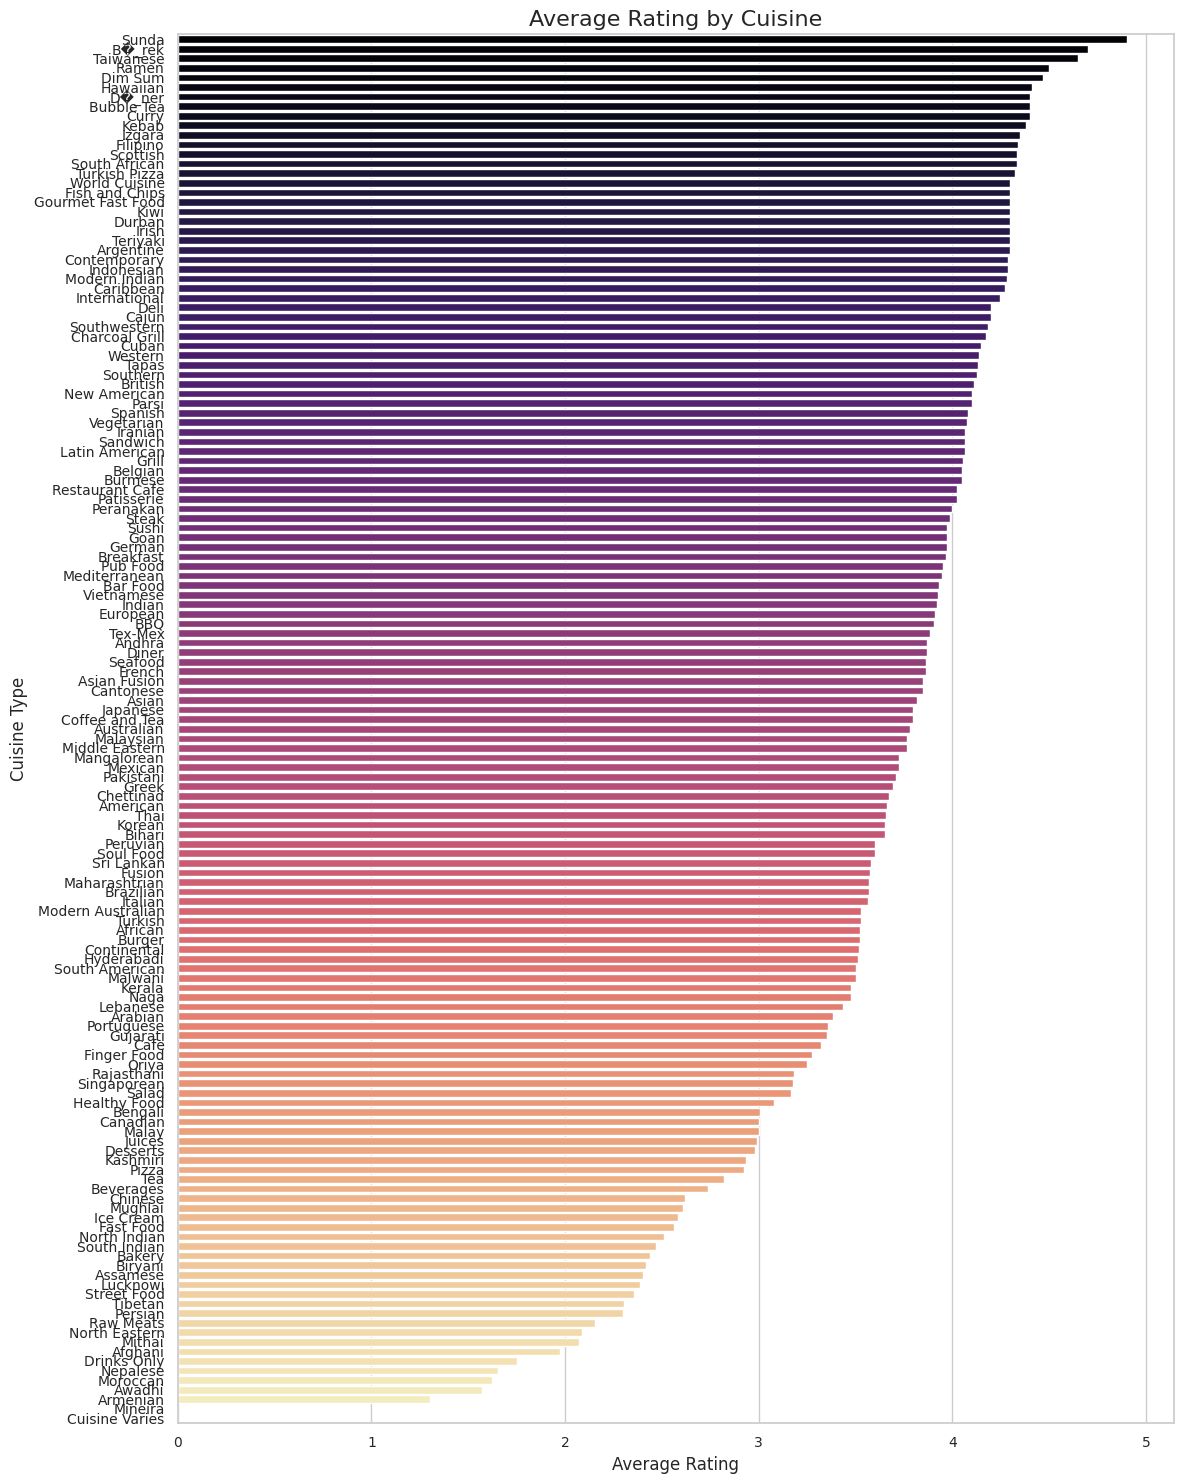

In [12]:
# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Plot average ratings by cuisine using a horizontal bar plot
plt.figure(figsize=(12, 15))
sns.barplot(y='Cuisines List', x='Aggregate rating', data=cuisine_rating.sort_values(by='Aggregate rating', ascending=False), palette='magma')
plt.title('Average Rating by Cuisine', fontsize=16)
plt.ylabel('Cuisine Type', fontsize=12)
plt.xlabel('Average Rating', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


Plotting Total Votes by Cuisine

<ipython-input-13-c348f20ab125>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Cuisines List', x='Votes', data=cuisine_votes.sort_values(by='Votes', ascending=False), palette='cubehelix')


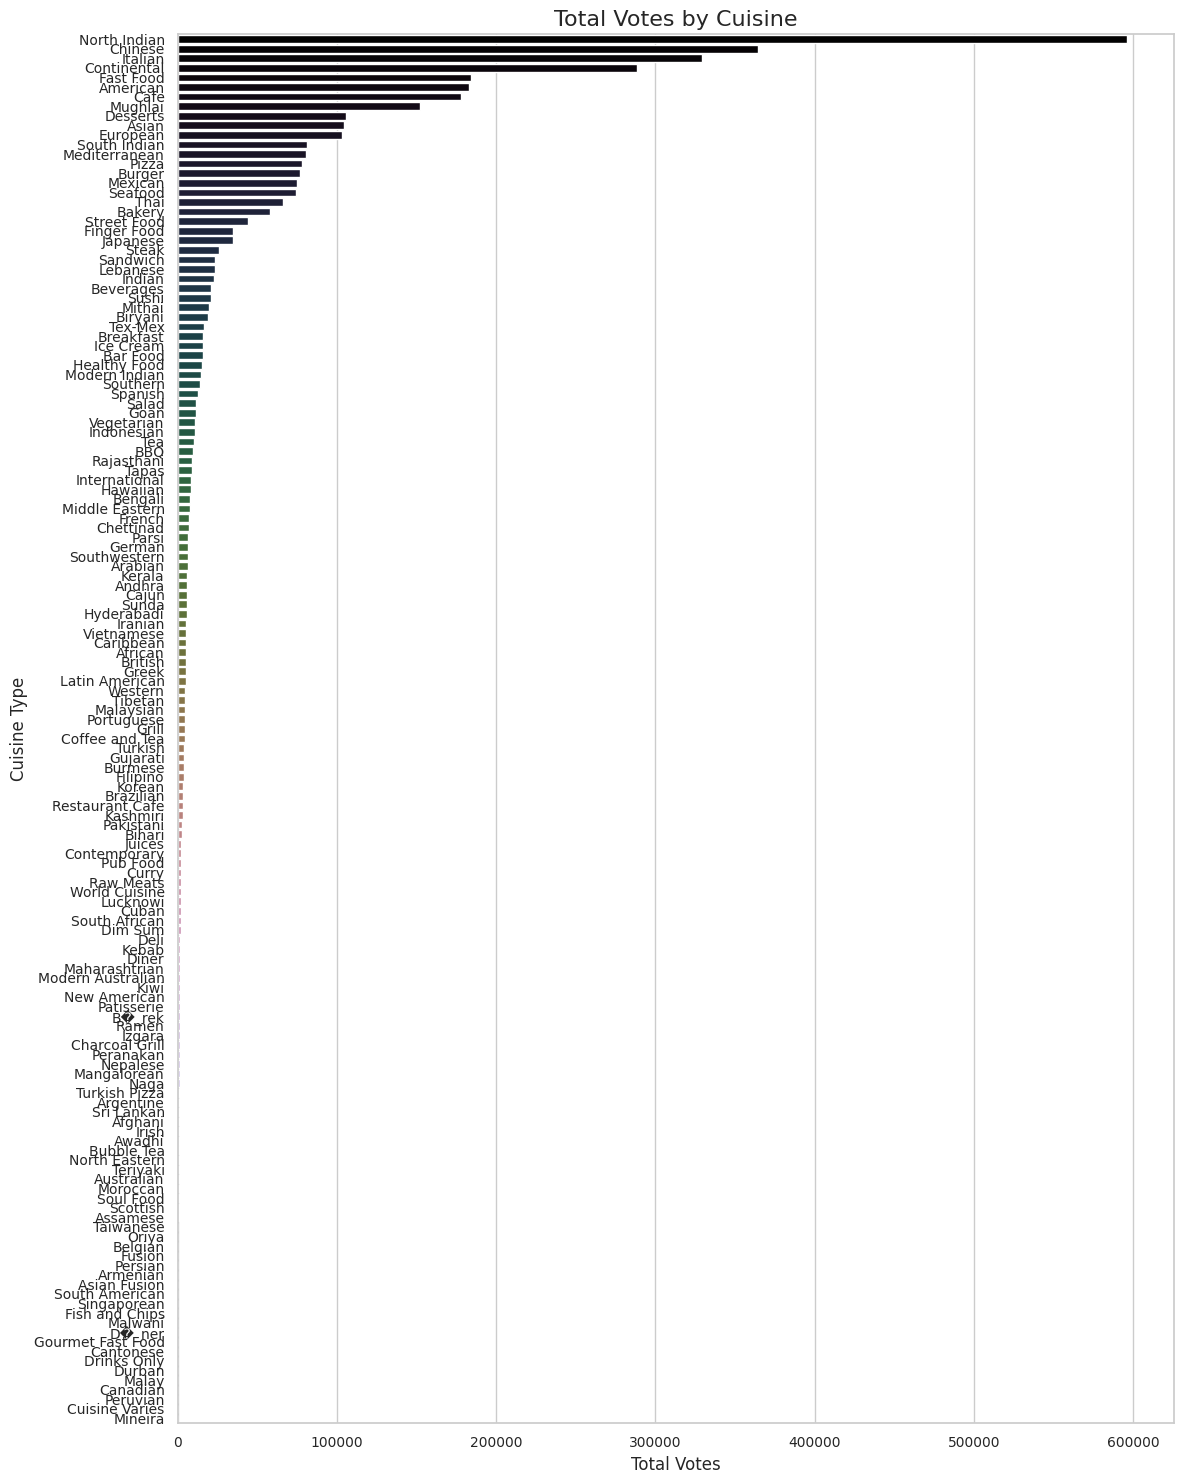

In [13]:
# Plot total votes by cuisine using a horizontal bar plot
plt.figure(figsize=(12, 15))
sns.barplot(y='Cuisines List', x='Votes', data=cuisine_votes.sort_values(by='Votes', ascending=False), palette='cubehelix')
plt.title('Total Votes by Cuisine', fontsize=16)
plt.ylabel('Cuisine Type', fontsize=12)
plt.xlabel('Total Votes', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


#Analysis by Country and City
Grouping and Sorting Data

In [14]:
# Group by Country Code, City, and Cuisines List for deeper analysis
country_cuisine_rating = exploded_data.groupby(['Country Code', 'City', 'Cuisines List'])['Aggregate rating'].mean().reset_index()
country_cuisine_votes = exploded_data.groupby(['Country Code', 'City', 'Cuisines List'])['Votes'].sum().reset_index()

# Identify top 5 cuisines by rating and votes in each country and city
top_country_cuisine_rating = country_cuisine_rating.sort_values(by='Aggregate rating', ascending=False).head(5)
top_country_cuisine_votes = country_cuisine_votes.sort_values(by='Votes', ascending=False).head(5)

print(top_country_cuisine_rating)
print(top_country_cuisine_votes)

      Country Code        City Cuisines List  Aggregate rating
471              1     Lucknow      Lucknowi               4.9
979             94     Jakarta         Sunda               4.9
1040           162  Pasig City       Mexican               4.9
528              1      Mumbai       Mughlai               4.9
1129           189  Inner City  Contemporary               4.9
     Country Code       City Cuisines List   Votes
636             1  New Delhi  North Indian  308582
597             1  New Delhi       Chinese  188957
615             1  New Delhi       Italian  170013
598             1  New Delhi   Continental  147712
604             1  New Delhi     Fast Food  118273


#Results Display

In [15]:
# Print top cuisines globally and by country and city
print("Top 5 Cuisines by Average Rating Globally:")
print(cuisine_rating.sort_values(by='Aggregate rating', ascending=False).head(5))

print("\nTop 5 Most Popular Cuisines by Votes Globally:")
print(cuisine_votes.sort_values(by='Votes', ascending=False).head(5))

print("\nTop 5 Cuisines by Average Rating by Country and City:")
print(top_country_cuisine_rating)

print("\nTop 5 Most Popular Cuisines by Votes by Country and City:")
print(top_country_cuisine_votes)


Top 5 Cuisines by Average Rating Globally:
    Cuisines List  Aggregate rating
130         Sunda          4.900000
26         B�_rek          4.700000
132     Taiwanese          4.650000
112         Ramen          4.500000
43        Dim Sum          4.466667

Top 5 Most Popular Cuisines by Votes Globally:
    Cuisines List   Votes
100  North Indian  595981
34        Chinese  364351
70        Italian  329265
37    Continental  288255
49      Fast Food  184058

Top 5 Cuisines by Average Rating by Country and City:
      Country Code        City Cuisines List  Aggregate rating
471              1     Lucknow      Lucknowi               4.9
979             94     Jakarta         Sunda               4.9
1040           162  Pasig City       Mexican               4.9
528              1      Mumbai       Mughlai               4.9
1129           189  Inner City  Contemporary               4.9

Top 5 Most Popular Cuisines by Votes by Country and City:
     Country Code       City Cuisines List   

#Task 3: Data Visualization

#Importing Libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Loading the Dataset

In [24]:
# Load the dataset
file_path = 'Dataset .csv'
data = pd.read_csv(file_path)


#Distribution of Ratings

In [23]:
# Set the style of seaborn
sns.set(style='whitegrid')


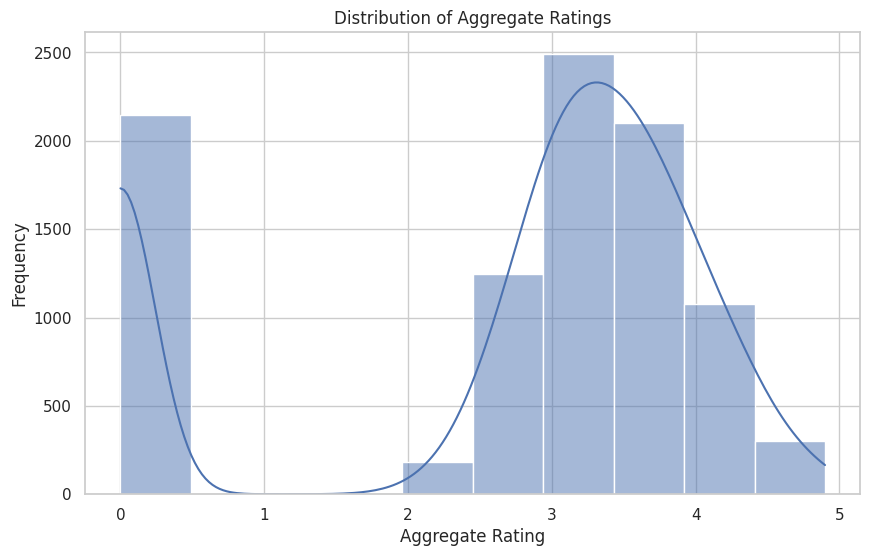

<ipython-input-25-b26f6ee387ed>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


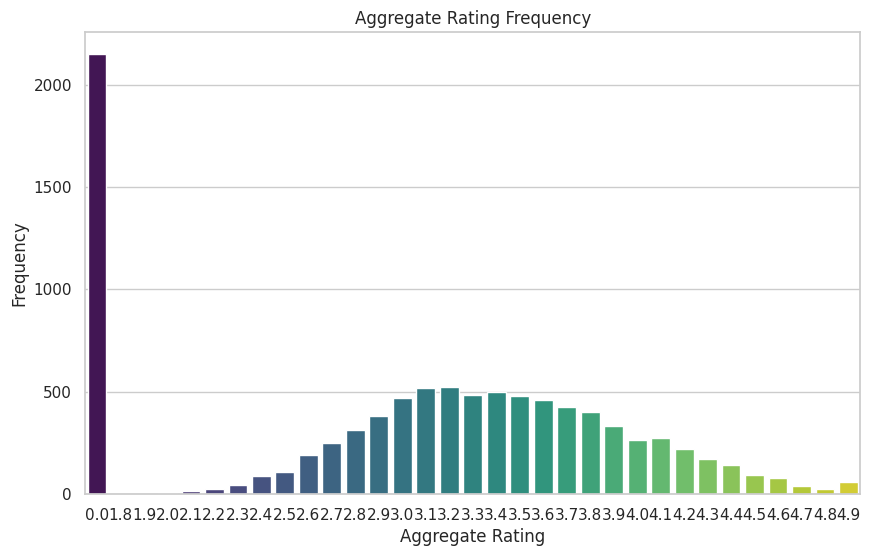

In [25]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['Aggregate rating'], bins=10, kde=True)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

# Compare with a bar plot
rating_counts = data['Aggregate rating'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Aggregate Rating Frequency')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()


#Compare Average Ratings of Different Cuisines

<ipython-input-26-b6b54e1b94b5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_ratings.values, y=cuisine_ratings.index, palette='viridis')


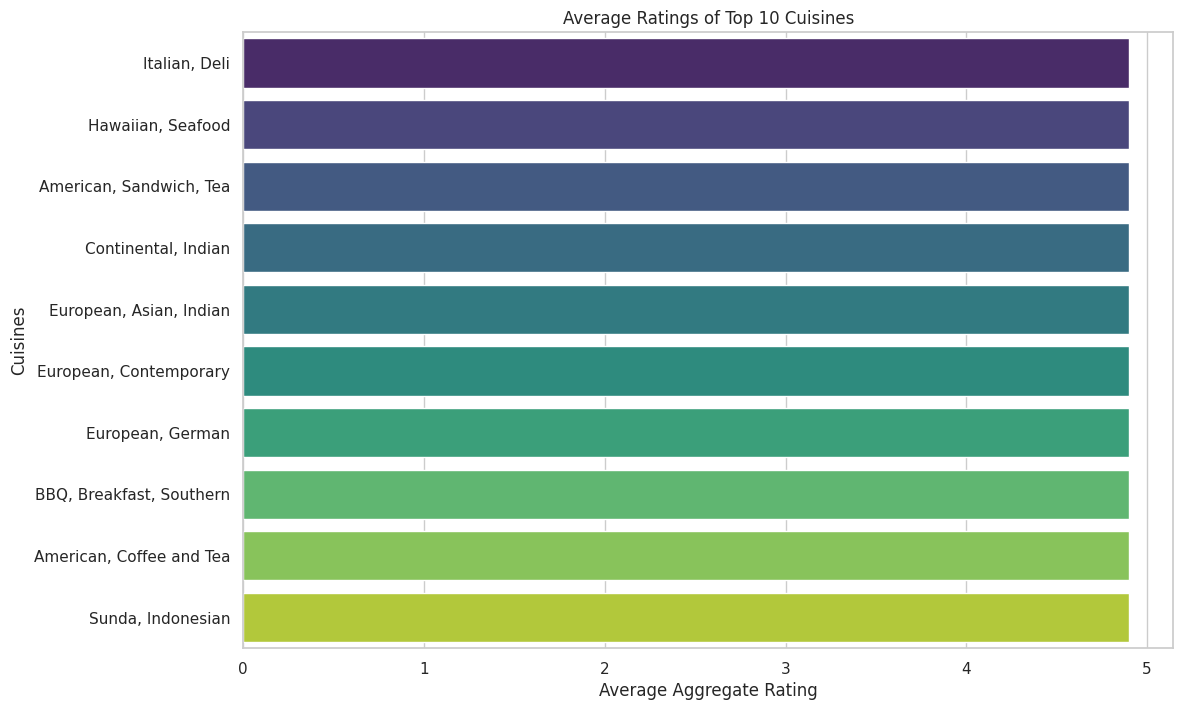

In [26]:
# Compare Average Ratings of Different Cuisines
# Group by cuisine and calculate the average rating
cuisine_ratings = data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

# Plot the average ratings of different cuisines
plt.figure(figsize=(12, 8))
sns.barplot(x=cuisine_ratings.values, y=cuisine_ratings.index, palette='viridis')
plt.title('Average Ratings of Top 10 Cuisines')
plt.xlabel('Average Aggregate Rating')
plt.ylabel('Cuisines')
plt.show()


#Compare Average Ratings of Different Cities

<ipython-input-27-dab95e9ac2ec>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_ratings.values, y=city_ratings.index, palette='coolwarm')


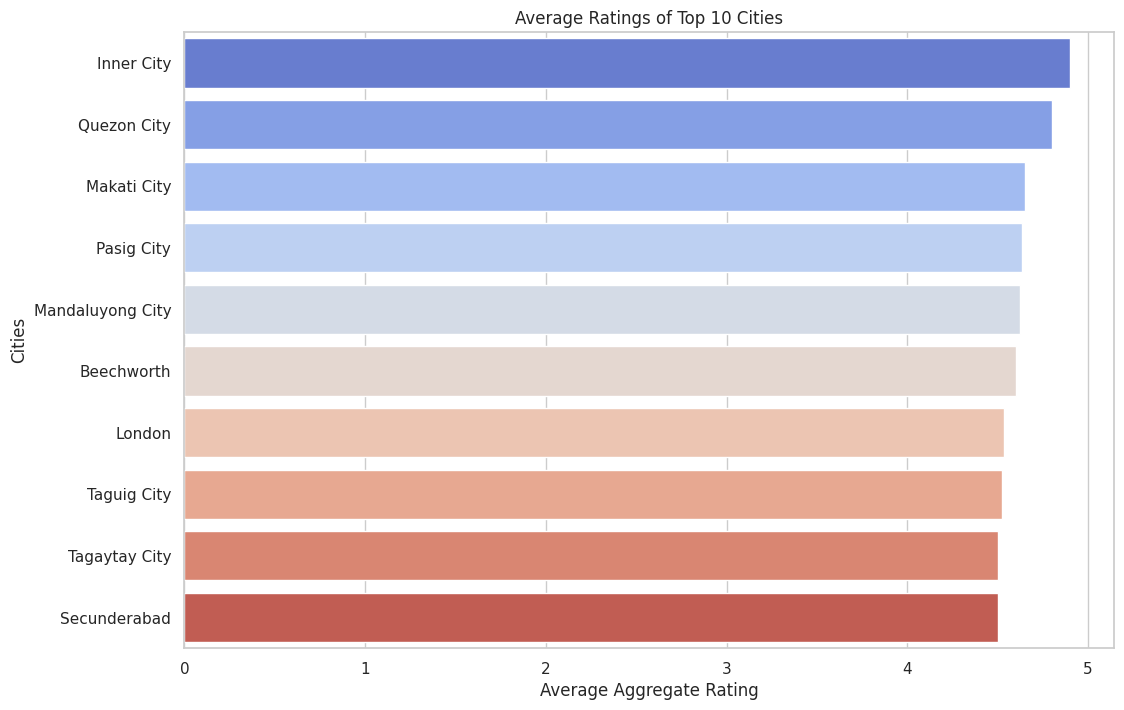

In [27]:
# Compare Average Ratings of Different Cities
city_ratings = data.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=city_ratings.values, y=city_ratings.index, palette='coolwarm')
plt.title('Average Ratings of Top 10 Cities')
plt.xlabel('Average Aggregate Rating')
plt.ylabel('Cities')
plt.show()


#Relationship between Features and Ratings

<ipython-input-28-622fc4363128>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price range', y='Aggregate rating', data=data, palette='Set2')


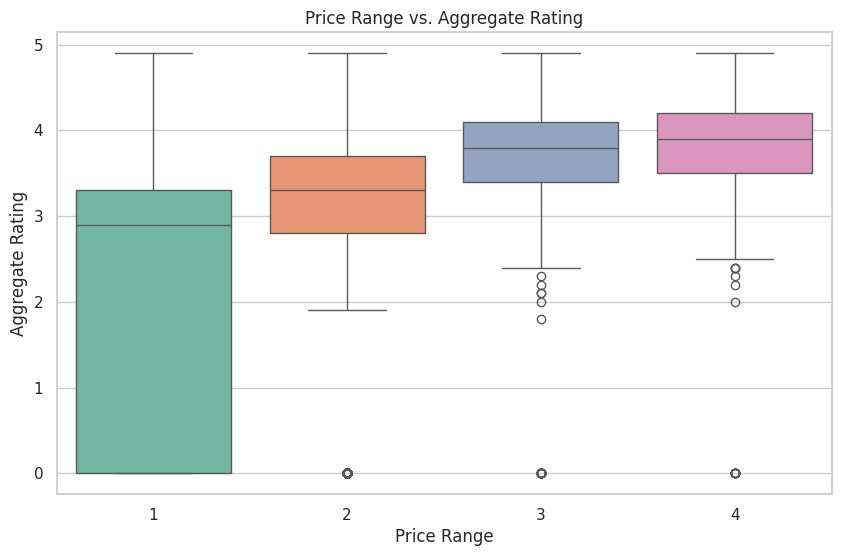

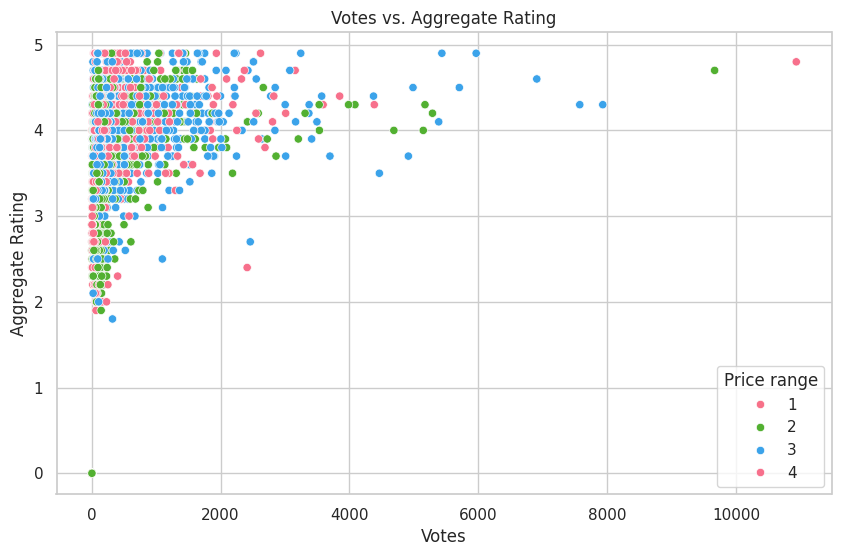

In [28]:
# Relationship between Features and Ratings

# a. Relationship between Price Range and Ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price range', y='Aggregate rating', data=data, palette='Set2')
plt.title('Price Range vs. Aggregate Rating')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()

# b. Relationship between Votes and Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=data, hue='Price range', palette='husl')
plt.title('Votes vs. Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()
